# Results: Monthly Precipitation Depth

Compare simulated monthly precipitation depth distributions to the underlying data sets

## Parameters and Imports

In [1]:
%matplotlib inline

In [2]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pickle
import seaborn as sns
from copy import deepcopy

In [3]:
IN_DIR = r'C:\Users\nmartin\Documents\CC_IRD\Process_Results'
SIM_ROOT = "DC_WGMN3"
MON_TOT_ROOT = "%s_%s_PreMonTotal_Dict.pickle"
DP_DATA_IN = r'C:\Users\nmartin\Documents\CC_IRD\Events\PRISM_DP_TotalPrecipDepth_by_Month.pickle'
P1_LOCA_IN = r'C:\Users\nmartin\Documents\CC_IRD\Events\LOCA_P1_TotalPrecipDepth_by_Month.pickle'
P2_LOCA_IN = r'C:\Users\nmartin\Documents\CC_IRD\Events\LOCA_P2_TotalPrecipDepth_by_Month.pickle'
P3_LOCA_IN = r'C:\Users\nmartin\Documents\CC_IRD\Events\LOCA_P3_TotalPrecipDepth_by_Month.pickle'

In [4]:
OUT_DIR = r'C:\Users\nmartin\Documents\CC_IRD\Events'

## Load

### Data and LOCA

In [5]:
with open( DP_DATA_IN, 'rb' ) as IP:
    PRISM_md = pickle.load( IP )

In [6]:
with open( P1_LOCA_IN, 'rb' ) as IP:
    LOCA_P1 = pickle.load( IP )

In [7]:
with open( P2_LOCA_IN, 'rb' ) as IP:
    LOCA_P2 = pickle.load( IP )

In [8]:
with open( P3_LOCA_IN, 'rb' ) as IP:
    LOCA_P3 = pickle.load( IP )

In [9]:
type( LOCA_P3 )

dict

### Simulation Results

In [10]:
InFile = os.path.normpath( os.path.join( IN_DIR, MON_TOT_ROOT % ( "DP", SIM_ROOT ) ) )
with open( InFile, 'rb' ) as IP:
    DP_SimDict = pickle.load( IP )

In [11]:
InFile = os.path.normpath( os.path.join( IN_DIR, MON_TOT_ROOT % ( "P1", SIM_ROOT ) ) )
with open( InFile, 'rb' ) as IP:
    P1_SimDict = pickle.load( IP )

In [12]:
InFile = os.path.normpath( os.path.join( IN_DIR, MON_TOT_ROOT % ( "P2", SIM_ROOT ) ) )
with open( InFile, 'rb' ) as IP:
    P2_SimDict = pickle.load( IP )

In [13]:
InFile = os.path.normpath( os.path.join( IN_DIR, MON_TOT_ROOT % ( "P3", SIM_ROOT ) ) )
with open( InFile, 'rb' ) as IP:
    P3_SimDict = pickle.load( IP )

In [14]:
type( P3_SimDict )

dict

## Make Plotting DataFrames

### Data Period

In [15]:
DataLabel1 = "PRISM 1981-2010"
SimLabel1 = "Simulated 1981-2010"

In [16]:
MonthLabels = list()
DSetLabels = list()

In [17]:
for jJ in range( 1, 13, 1):
    DataAr = PRISM_md[jJ]
    DataAr = np.where( DataAr < 1.0, 1.0, DataAr )
    NumDATA = DataAr.shape[0]
    SimAr = DP_SimDict[jJ]
    SimAr = np.where( SimAr < 1.0, 1.0, SimAr )
    NumSIM = SimAr.shape[0]
    print( "Month %d: %d PRISM values, max %g; %d sim values, max %g" % 
           (jJ, NumDATA, DataAr.max(), NumSIM, SimAr.max() ) )
    Data_Labels = [ DataLabel1 for x in range( NumDATA ) ]
    Sim_Labels = [ SimLabel1 for x in range( NumSIM ) ]
    AllLabels = deepcopy( Data_Labels )
    AllLabels.extend( Sim_Labels )
    DSetLabels.extend( AllLabels )
    if jJ == 1:
        MonthLabels.extend( ["Jan" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 2:
        MonthLabels.extend( ["Feb" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 3:
        MonthLabels.extend( ["Mar" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 4:
        MonthLabels.extend( ["Apr" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 5:
        MonthLabels.extend( ["May" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 6:
        MonthLabels.extend( ["Jun" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 7:
        MonthLabels.extend( ["Jul" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 8:
        MonthLabels.extend( ["Aug" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 9:
        MonthLabels.extend( ["Sep" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 10:
        MonthLabels.extend( ["Oct" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 11:
        MonthLabels.extend( ["Nov" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 12:
        MonthLabels.extend( ["Dec" for x in range( NumDATA + NumSIM ) ] )
    # end if
    if jJ == 1:
        AllValues = np.concatenate( [ DataAr, SimAr ], axis=0 )
    else:
        AllValues = np.concatenate( [ AllValues, DataAr, SimAr ], axis=0 )
    # end if

Month 1: 30 PRISM values, max 66.7401; 310000 sim values, max 179.687
Month 2: 30 PRISM values, max 87.9186; 310000 sim values, max 281.292
Month 3: 30 PRISM values, max 140.59; 310000 sim values, max 348.874
Month 4: 30 PRISM values, max 146.672; 310000 sim values, max 368.863
Month 5: 30 PRISM values, max 187.481; 310000 sim values, max 392.265
Month 6: 30 PRISM values, max 197.88; 310000 sim values, max 423.354
Month 7: 30 PRISM values, max 211.668; 310000 sim values, max 338.447
Month 8: 30 PRISM values, max 286.079; 310000 sim values, max 702.435
Month 9: 30 PRISM values, max 196.247; 310000 sim values, max 469.332
Month 10: 30 PRISM values, max 224.143; 310000 sim values, max 516.767
Month 11: 30 PRISM values, max 133.098; 310000 sim values, max 289.985
Month 12: 30 PRISM values, max 90.0409; 310000 sim values, max 240.479


In [18]:
DataDict = { "DLabel" : DSetLabels,
             "Month" : MonthLabels,
             "MonTotal" : AllValues, }
DPDF = pd.DataFrame( data=DataDict )

In [19]:
display( HTML( DPDF.head().to_html() ) )

,DLabel,Month,MonTotal
0,PRISM 1981-2010,Jan,18.677666
1,PRISM 1981-2010,Jan,9.888207
2,PRISM 1981-2010,Jan,31.688014
3,PRISM 1981-2010,Jan,36.788953
4,PRISM 1981-2010,Jan,39.146484


In [20]:
display( HTML( DPDF.describe().to_html() ) )

,MonTotal
count,3.720360e+06
mean,5.013517e+01
std,4.356721e+01
min,1.000000e+00
25%,1.804376e+01
50%,3.914849e+01
75%,7.017146e+01
max,7.024354e+02


In [21]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "SimDF_%s_TotMonDepth_1981-2010.pickle" % SIM_ROOT ) )
DPDF.to_pickle( OutFiler, compression='zip', protocol=-1 )

### Projection Period 1

In [22]:
DataLabel2 = "LOCA 2011-2040"
SimLabel2 = "Simulated 2011-2040"

In [23]:
MonthLabels = list()
DSetLabels = list()

In [24]:
for jJ in range( 1, 13, 1):
    DataAr = LOCA_P1[jJ]
    DataAr = np.where( DataAr < 1.0, 1.0, DataAr )
    NumDATA = DataAr.shape[0]
    SimAr = P1_SimDict[jJ]
    SimAr = np.where( SimAr < 1.0, 1.0, SimAr )
    NumSIM = SimAr.shape[0]
    print( "Month %d: %d LOCA values, max %g; %d sim values, max %g" % 
           (jJ, NumDATA, DataAr.max(), NumSIM, SimAr.max() ) )
    Data_Labels = [ DataLabel2 for x in range( NumDATA ) ]
    Sim_Labels = [ SimLabel2 for x in range( NumSIM ) ]
    AllLabels = deepcopy( Data_Labels )
    AllLabels.extend( Sim_Labels )
    DSetLabels.extend( AllLabels )
    if jJ == 1:
        MonthLabels.extend( ["Jan" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 2:
        MonthLabels.extend( ["Feb" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 3:
        MonthLabels.extend( ["Mar" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 4:
        MonthLabels.extend( ["Apr" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 5:
        MonthLabels.extend( ["May" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 6:
        MonthLabels.extend( ["Jun" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 7:
        MonthLabels.extend( ["Jul" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 8:
        MonthLabels.extend( ["Aug" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 9:
        MonthLabels.extend( ["Sep" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 10:
        MonthLabels.extend( ["Oct" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 11:
        MonthLabels.extend( ["Nov" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 12:
        MonthLabels.extend( ["Dec" for x in range( NumDATA + NumSIM ) ] )
    # end if
    if jJ == 1:
        AllValues = np.concatenate( [ DataAr, SimAr ], axis=0 )
    else:
        AllValues = np.concatenate( [ AllValues, DataAr, SimAr ], axis=0 )
    # end if

Month 1: 1920 LOCA values, max 141.933; 300000 sim values, max 173.802
Month 2: 1920 LOCA values, max 181.808; 300000 sim values, max 310.851
Month 3: 1920 LOCA values, max 234.909; 300000 sim values, max 334.278
Month 4: 1920 LOCA values, max 218.647; 300000 sim values, max 412.485
Month 5: 1920 LOCA values, max 348.565; 300000 sim values, max 443.091
Month 6: 1920 LOCA values, max 382.876; 300000 sim values, max 483.959
Month 7: 1920 LOCA values, max 377.249; 300000 sim values, max 396.745
Month 8: 1920 LOCA values, max 428.374; 300000 sim values, max 730.675
Month 9: 1920 LOCA values, max 522.224; 300000 sim values, max 641.063
Month 10: 1920 LOCA values, max 355.571; 300000 sim values, max 486.973
Month 11: 1920 LOCA values, max 171.335; 300000 sim values, max 268.62
Month 12: 1920 LOCA values, max 233.96; 300000 sim values, max 249.206


In [25]:
DataDict = { "DLabel" : DSetLabels,
             "Month" : MonthLabels,
             "MonTotal" : AllValues, }
P1DF = pd.DataFrame( data=DataDict )

In [26]:
display( HTML( P1DF.describe().to_html() ) )

,MonTotal
count,3.623040e+06
mean,4.851930e+01
std,4.625888e+01
min,1.000000e+00
25%,1.507453e+01
50%,3.494617e+01
75%,6.774992e+01
max,7.306752e+02


In [27]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "SimDF_%s_TotMonDepth_2011-2040.pickle" % SIM_ROOT ) )
P1DF.to_pickle( OutFiler, compression='zip', protocol=-1 )

### Projection Period 2

In [28]:
DataLabel3 = "LOCA 2041-2070"
SimLabel3 = "Simulated 2041-2070"

In [29]:
MonthLabels = list()
DSetLabels = list()

In [30]:
for jJ in range( 1, 13, 1):
    DataAr = LOCA_P2[jJ]
    DataAr = np.where( DataAr < 1.0, 1.0, DataAr )
    NumDATA = DataAr.shape[0]
    SimAr = P2_SimDict[jJ]
    SimAr = np.where( SimAr < 1.0, 1.0, SimAr )
    NumSIM = SimAr.shape[0]
    print( "Month %d: %d LOCA values, max %g; %d sim values, max %g" % 
           (jJ, NumDATA, DataAr.max(), NumSIM, SimAr.max() ) )
    Data_Labels = [ DataLabel3 for x in range( NumDATA ) ]
    Sim_Labels = [ SimLabel3 for x in range( NumSIM ) ]
    AllLabels = deepcopy( Data_Labels )
    AllLabels.extend( Sim_Labels )
    DSetLabels.extend( AllLabels )
    if jJ == 1:
        MonthLabels.extend( ["Jan" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 2:
        MonthLabels.extend( ["Feb" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 3:
        MonthLabels.extend( ["Mar" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 4:
        MonthLabels.extend( ["Apr" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 5:
        MonthLabels.extend( ["May" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 6:
        MonthLabels.extend( ["Jun" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 7:
        MonthLabels.extend( ["Jul" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 8:
        MonthLabels.extend( ["Aug" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 9:
        MonthLabels.extend( ["Sep" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 10:
        MonthLabels.extend( ["Oct" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 11:
        MonthLabels.extend( ["Nov" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 12:
        MonthLabels.extend( ["Dec" for x in range( NumDATA + NumSIM ) ] )
    # end if
    if jJ == 1:
        AllValues = np.concatenate( [ DataAr, SimAr ], axis=0 )
    else:
        AllValues = np.concatenate( [ AllValues, DataAr, SimAr ], axis=0 )
    # end if

Month 1: 1920 LOCA values, max 124.03; 300000 sim values, max 170.896
Month 2: 1920 LOCA values, max 223.42; 300000 sim values, max 311.002
Month 3: 1920 LOCA values, max 265.512; 300000 sim values, max 370.708
Month 4: 1920 LOCA values, max 236.054; 300000 sim values, max 385.913
Month 5: 1920 LOCA values, max 301.628; 300000 sim values, max 413.362
Month 6: 1920 LOCA values, max 423.121; 300000 sim values, max 501.133
Month 7: 1920 LOCA values, max 550.796; 300000 sim values, max 364.989
Month 8: 1920 LOCA values, max 497.165; 300000 sim values, max 688.703
Month 9: 1920 LOCA values, max 477.451; 300000 sim values, max 510.287
Month 10: 1920 LOCA values, max 372.07; 300000 sim values, max 473.217
Month 11: 1920 LOCA values, max 247.067; 300000 sim values, max 340.379
Month 12: 1920 LOCA values, max 286.493; 300000 sim values, max 286.988


In [31]:
DataDict = { "DLabel" : DSetLabels,
             "Month" : MonthLabels,
             "MonTotal" : AllValues, }
P2DF = pd.DataFrame( data=DataDict )

In [32]:
display( HTML( P2DF.describe().to_html() ) )

,MonTotal
count,3.623040e+06
mean,4.910689e+01
std,4.660039e+01
min,1.000000e+00
25%,1.521701e+01
50%,3.548088e+01
75%,6.883288e+01
max,6.887034e+02


In [33]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "SimDF_%s_TotMonDepth_2041-2070.pickle" % SIM_ROOT ) )
P2DF.to_pickle( OutFiler, compression='zip', protocol=-1 )

### Projection Period 3

In [34]:
DataLabel4 = "LOCA 2071-2099"
SimLabel4 = "Simulated 2071-2100"

In [35]:
MonthLabels = list()
DSetLabels = list()

In [36]:
for jJ in range( 1, 13, 1):
    DataAr = LOCA_P3[jJ]
    DataAr = np.where( DataAr < 1.0, 1.0, DataAr )
    NumDATA = DataAr.shape[0]
    SimAr = P3_SimDict[jJ]
    SimAr = np.where( SimAr < 1.0, 1.0, SimAr )
    NumSIM = SimAr.shape[0]
    print( "Month %d: %d LOCA values, max %g; %d sim values, max %g" % 
           (jJ, NumDATA, DataAr.max(), NumSIM, SimAr.max() ) )
    Data_Labels = [ DataLabel4 for x in range( NumDATA ) ]
    Sim_Labels = [ SimLabel4 for x in range( NumSIM ) ]
    AllLabels = deepcopy( Data_Labels )
    AllLabels.extend( Sim_Labels )
    DSetLabels.extend( AllLabels )
    if jJ == 1:
        MonthLabels.extend( ["Jan" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 2:
        MonthLabels.extend( ["Feb" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 3:
        MonthLabels.extend( ["Mar" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 4:
        MonthLabels.extend( ["Apr" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 5:
        MonthLabels.extend( ["May" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 6:
        MonthLabels.extend( ["Jun" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 7:
        MonthLabels.extend( ["Jul" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 8:
        MonthLabels.extend( ["Aug" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 9:
        MonthLabels.extend( ["Sep" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 10:
        MonthLabels.extend( ["Oct" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 11:
        MonthLabels.extend( ["Nov" for x in range( NumDATA + NumSIM ) ] )
    elif jJ == 12:
        MonthLabels.extend( ["Dec" for x in range( NumDATA + NumSIM ) ] )
    # end if
    if jJ == 1:
        AllValues = np.concatenate( [ DataAr, SimAr ], axis=0 )
    else:
        AllValues = np.concatenate( [ AllValues, DataAr, SimAr ], axis=0 )
    # end if

Month 1: 1856 LOCA values, max 168.968; 300000 sim values, max 173.642
Month 2: 1856 LOCA values, max 204.251; 300000 sim values, max 311.554
Month 3: 1856 LOCA values, max 166.378; 300000 sim values, max 358.843
Month 4: 1856 LOCA values, max 217.13; 300000 sim values, max 388.361
Month 5: 1856 LOCA values, max 323.932; 300000 sim values, max 426.396
Month 6: 1856 LOCA values, max 578.341; 300000 sim values, max 531.069
Month 7: 1856 LOCA values, max 508.439; 300000 sim values, max 405.361
Month 8: 1856 LOCA values, max 514.574; 300000 sim values, max 652.495
Month 9: 1856 LOCA values, max 462.866; 300000 sim values, max 571.214
Month 10: 1856 LOCA values, max 322.001; 300000 sim values, max 478.984
Month 11: 1856 LOCA values, max 277.418; 300000 sim values, max 308.507
Month 12: 1856 LOCA values, max 213.798; 300000 sim values, max 305.239


In [37]:
DataDict = { "DLabel" : DSetLabels,
             "Month" : MonthLabels,
             "MonTotal" : AllValues, }
P3DF = pd.DataFrame( data=DataDict )

In [38]:
display( HTML( P3DF.describe().to_html() ) )

,MonTotal
count,3.622272e+06
mean,5.018194e+01
std,4.879481e+01
min,1.000000e+00
25%,1.505043e+01
50%,3.549514e+01
75%,7.008211e+01
max,6.524950e+02


In [39]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "SimDF_%s_TotMonDepth_2071-2100.pickle" % SIM_ROOT ) )
P3DF.to_pickle( OutFiler, compression='zip', protocol=-1 )

## Plots

In [40]:
preTicks = [ 1.0, 10.0, 100.0, 500.0, 1000.0 ]

In [41]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Results_MonTotPreDep_%s_BW.svg" % SIM_ROOT ) )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Results_MonTotPreDep_DC_WGMN3_BW.svg'

In [42]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Results_MonTotPreDep_%s_BW.png" % SIM_ROOT) )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Results_MonTotPreDep_DC_WGMN3_BW.png'

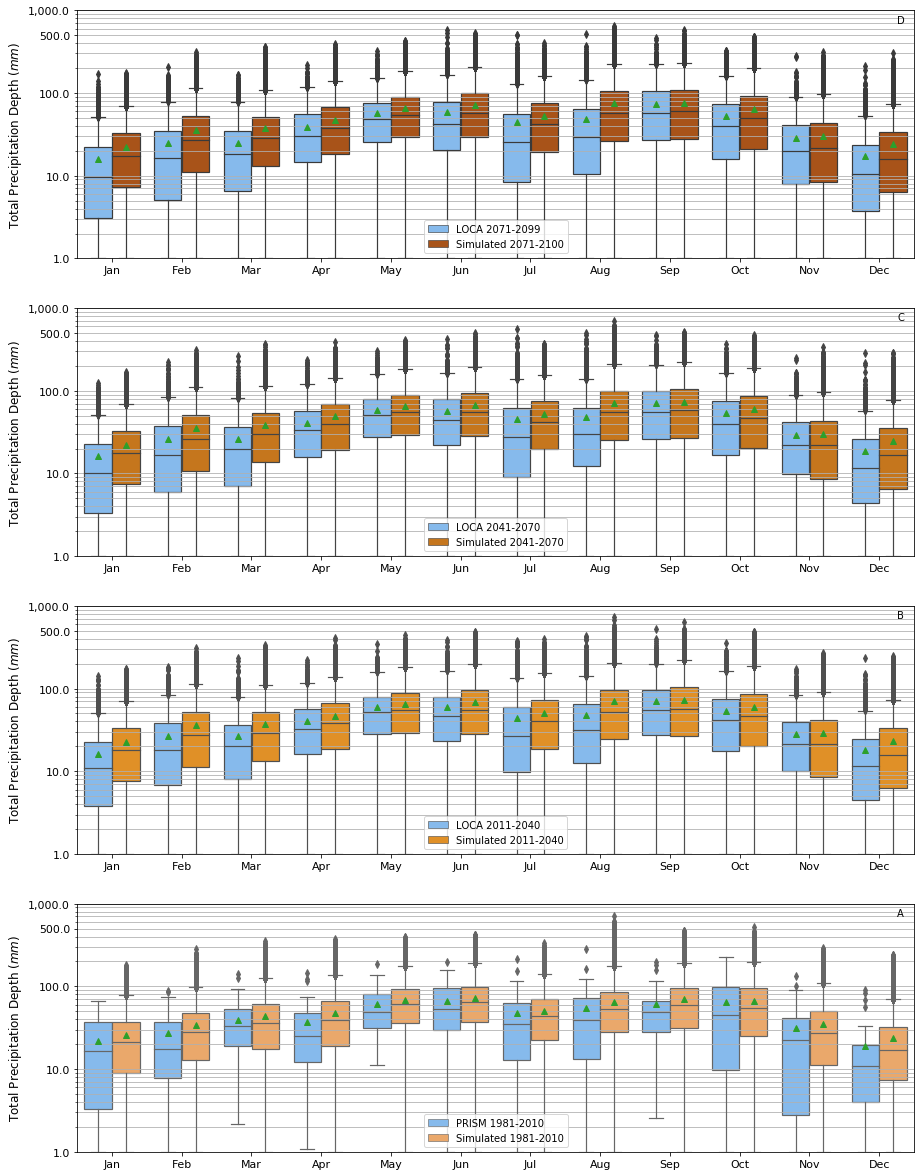

In [43]:
Fig1 = plt.figure()
Fig1.set_size_inches(15, 21)
ax11 = Fig1.add_subplot(4,1,1)
g1 = sns.boxplot( x="Month", y="MonTotal", hue="DLabel",
                  dodge=True, linewidth=1.2, orient="v", showmeans=True,
                  palette={ DataLabel4 : "xkcd:sky blue", 
                            SimLabel4 : "xkcd:burnt orange" },
                  data=P3DF, ax=ax11 )
g1.legend(prop=dict(size=11))
g1.legend(loc="lower center")
g1.set_yscale('log')
g1.grid(b=True, which="both", axis='y')
g1.set_yticks( preTicks )
g1.set_xlabel('', fontsize=12 )
g1.set_ylabel('Total Precipitation Depth ($mm$)', fontsize=12)
g1.set_ylim( ( 1.0, 1000.0))
g1.tick_params(axis='both', which='major', labelsize=11)
g1.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
g1.annotate("D", xy=(0.98,0.95), xycoords="axes fraction")
ax21 = Fig1.add_subplot(4,1,2)
g2 = sns.boxplot( x="Month", y="MonTotal", hue="DLabel",
                  dodge=True, linewidth=1.2, orient="v", showmeans=True,
                  palette={ DataLabel3 : "xkcd:sky blue", 
                            SimLabel3 : "xkcd:pumpkin" },
                  data=P2DF, ax=ax21 )
g2.legend(prop=dict(size=11))
g2.legend(loc="lower center")
g2.set_yscale('log')
g2.grid(b=True, which="both", axis='y')
g2.set_yticks( preTicks )
g2.set_xlabel('', fontsize=12 )
g2.set_ylabel('Total Precipitation Depth ($mm$)', fontsize=12)
g2.set_ylim( ( 1.0, 1000.0))
g2.tick_params(axis='both', which='major', labelsize=11)
g2.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
g2.annotate("C", xy=(0.98,0.95), xycoords="axes fraction")
ax31 = Fig1.add_subplot(4,1,3)
g3 = sns.boxplot( x="Month", y="MonTotal", hue="DLabel",
                  dodge=True, linewidth=1.2, orient="v", showmeans=True,
                  palette={ DataLabel2 : "xkcd:sky blue", 
                            SimLabel2 : "xkcd:tangerine" },
                  data=P1DF, ax=ax31 )
g3.legend(prop=dict(size=11))
g3.legend(loc="lower center")
g3.set_yscale('log')
g3.grid(b=True, which="both", axis='y')
g3.set_yticks( preTicks )
g3.set_xlabel('', fontsize=12 )
g3.set_ylabel('Total Precipitation Depth ($mm$)', fontsize=12)
g3.set_ylim( ( 1.0, 1000.0))
g3.tick_params(axis='both', which='major', labelsize=11)
g3.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
g3.annotate("B", xy=(0.98,0.95), xycoords="axes fraction")
ax41 = Fig1.add_subplot(4,1,4)
g4 = sns.boxplot( x="Month", y="MonTotal", hue="DLabel",
                  dodge=True, linewidth=1.2, orient="v", showmeans=True,
                  palette={ DataLabel1 : "xkcd:sky blue", 
                            SimLabel1 : "xkcd:pale orange" },
                  data=DPDF, ax=ax41 )
g4.legend(prop=dict(size=11))
g4.legend(loc="lower center")
g4.set_yscale('log')
g4.grid(b=True, which="both", axis='y')
g4.set_yticks( preTicks )
g4.set_xlabel('', fontsize=12 )
g4.set_ylabel('Total Precipitation Depth ($mm$)', fontsize=12)
g4.set_ylim( ( 1.0, 1000.0))
g4.tick_params(axis='both', which='major', labelsize=11)
g4.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
g4.annotate("A", xy=(0.98,0.95), xycoords="axes fraction")
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )